## parameters affecting the loan interest rates for applicants based on their personal information

### Importing Data and packages:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('LoanData.csv')
df.head()

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,79542.0,25000,25000,18.49%,60 months,debt_consolidation,27.56%,VA,MORTGAGE,8606.56,720-724,11,15210,3.0,5 years
1,75473.0,19750,19750,17.27%,60 months,debt_consolidation,13.39%,NY,MORTGAGE,6737.50,710-714,14,19070,3.0,4 years
2,67265.0,2100,2100,14.33%,36 months,major_purchase,3.50%,LA,OWN,1000.00,690-694,13,893,1.0,< 1 year
3,80167.0,28000,28000,16.29%,36 months,credit_card,19.62%,NV,MORTGAGE,7083.33,710-714,12,38194,1.0,10+ years
4,17240.0,24250,17431.82,12.23%,60 months,credit_card,23.79%,OH,MORTGAGE,5833.33,730-734,6,31061,2.0,10+ years


### Modify columns name

In [3]:
df.columns = df.columns.str.replace(".","_")
df.columns

Index(['ID', 'Amount_Requested', 'Amount_Funded_By_Investors', 'Interest_Rate',
       'Loan_Length', 'Loan_Purpose', 'Debt_To_Income_Ratio', 'State',
       'Home_Ownership', 'Monthly_Income', 'FICO_Range', 'Open_CREDIT_Lines',
       'Revolving_CREDIT_Balance', 'Inquiries_in_the_Last_6_Months',
       'Employment_Length'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              2199 non-null   float64
 1   Amount_Requested                2199 non-null   object 
 2   Amount_Funded_By_Investors      2199 non-null   object 
 3   Interest_Rate                   2200 non-null   object 
 4   Loan_Length                     2199 non-null   object 
 5   Loan_Purpose                    2199 non-null   object 
 6   Debt_To_Income_Ratio            2199 non-null   object 
 7   State                           2199 non-null   object 
 8   Home_Ownership                  2199 non-null   object 
 9   Monthly_Income                  2197 non-null   float64
 10  FICO_Range                      2200 non-null   object 
 11  Open_CREDIT_Lines               2196 non-null   object 
 12  Revolving_CREDIT_Balance        21

In [5]:
df.isnull().sum()

ID                                 1
Amount_Requested                   1
Amount_Funded_By_Investors         1
Interest_Rate                      0
Loan_Length                        1
Loan_Purpose                       1
Debt_To_Income_Ratio               1
State                              1
Home_Ownership                     1
Monthly_Income                     3
FICO_Range                         0
Open_CREDIT_Lines                  4
Revolving_CREDIT_Balance           3
Inquiries_in_the_Last_6_Months     3
Employment_Length                 69
dtype: int64

In [6]:
df['Employment_Length'].mode()[0]

'10+ years'

In [7]:
df['Employment_Length']=df['Employment_Length'].fillna(df['Employment_Length'].mode()[0])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              2199 non-null   float64
 1   Amount_Requested                2199 non-null   object 
 2   Amount_Funded_By_Investors      2199 non-null   object 
 3   Interest_Rate                   2200 non-null   object 
 4   Loan_Length                     2199 non-null   object 
 5   Loan_Purpose                    2199 non-null   object 
 6   Debt_To_Income_Ratio            2199 non-null   object 
 7   State                           2199 non-null   object 
 8   Home_Ownership                  2199 non-null   object 
 9   Monthly_Income                  2197 non-null   float64
 10  FICO_Range                      2200 non-null   object 
 11  Open_CREDIT_Lines               2196 non-null   object 
 12  Revolving_CREDIT_Balance        21

In [9]:
df.dropna(axis=0 , inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2186 entries, 0 to 2199
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              2186 non-null   float64
 1   Amount_Requested                2186 non-null   object 
 2   Amount_Funded_By_Investors      2186 non-null   object 
 3   Interest_Rate                   2186 non-null   object 
 4   Loan_Length                     2186 non-null   object 
 5   Loan_Purpose                    2186 non-null   object 
 6   Debt_To_Income_Ratio            2186 non-null   object 
 7   State                           2186 non-null   object 
 8   Home_Ownership                  2186 non-null   object 
 9   Monthly_Income                  2186 non-null   float64
 10  FICO_Range                      2186 non-null   object 
 11  Open_CREDIT_Lines               2186 non-null   object 
 12  Revolving_CREDIT_Balance        21

## changing datatypes 

In [11]:
df['Amount_Requested'] = pd.to_numeric(df['Amount_Requested'],errors = 'coerce')
df['Amount_Funded_By_Investors'] = pd.to_numeric(df['Amount_Funded_By_Investors'],errors = 'coerce')
df['Open_CREDIT_Lines'] = pd.to_numeric(df['Open_CREDIT_Lines'],errors = 'coerce')
df['Revolving_CREDIT_Balance'] = pd.to_numeric(df['Revolving_CREDIT_Balance'],errors = 'coerce')
df['Inquiries_in_the_Last_6_Months'] = pd.to_numeric(df['Inquiries_in_the_Last_6_Months'],errors = 'coerce')

In [12]:
df.head()

,ID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,79542.0,25000.0,25000.00,18.49%,60 months,debt_consolidation,27.56%,VA,MORTGAGE,8606.56,720-724,11.0,15210.0,3.0,5 years
1,75473.0,19750.0,19750.00,17.27%,60 months,debt_consolidation,13.39%,NY,MORTGAGE,6737.50,710-714,14.0,19070.0,3.0,4 years
2,67265.0,2100.0,2100.00,14.33%,36 months,major_purchase,3.50%,LA,OWN,1000.00,690-694,13.0,893.0,1.0,< 1 year
3,80167.0,28000.0,28000.00,16.29%,36 months,credit_card,19.62%,NV,MORTGAGE,7083.33,710-714,12.0,38194.0,1.0,10+ years
4,17240.0,24250.0,17431.82,12.23%,60 months,credit_card,23.79%,OH,MORTGAGE,5833.33,730-734,6.0,31061.0,2.0,10+ years


In [13]:
df['Interest_Rate']=df['Interest_Rate'].str.replace('%','').astype('float64')

In [14]:
df['Loan_Length']=df['Loan_Length'].str.split(' ').apply(lambda x : x[0]).tolist()

In [15]:
df['Loan_Length'] = pd.to_numeric(df['Loan_Length'],errors = 'coerce')

In [16]:
df['Debt_To_Income_Ratio']=df['Debt_To_Income_Ratio'].str.replace('%','').astype('float64')

In [17]:
df.head()

,ID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,79542.0,25000.0,25000.00,18.49,60.0,debt_consolidation,27.56,VA,MORTGAGE,8606.56,720-724,11.0,15210.0,3.0,5 years
1,75473.0,19750.0,19750.00,17.27,60.0,debt_consolidation,13.39,NY,MORTGAGE,6737.50,710-714,14.0,19070.0,3.0,4 years
2,67265.0,2100.0,2100.00,14.33,36.0,major_purchase,3.50,LA,OWN,1000.00,690-694,13.0,893.0,1.0,< 1 year
3,80167.0,28000.0,28000.00,16.29,36.0,credit_card,19.62,NV,MORTGAGE,7083.33,710-714,12.0,38194.0,1.0,10+ years
4,17240.0,24250.0,17431.82,12.23,60.0,credit_card,23.79,OH,MORTGAGE,5833.33,730-734,6.0,31061.0,2.0,10+ years


In [18]:
df.Employment_Length = df.Employment_Length.str.replace('<','')
df.Employment_Length = df.Employment_Length.str.replace('years','')
df.Employment_Length = df.Employment_Length.str.replace('year','')
df.Employment_Length = df.Employment_Length.str.replace('+','')
df['Employment_Length'] = pd.to_numeric(df['Employment_Length'],errors = 'coerce')

In [19]:
df[['Min_Fic','Max_Fic']] = df.FICO_Range.str.split('-',expand=True).astype('float64')
df['Fico_Mean'] = (df.Min_Fic + df.Max_Fic)/2

display(df,df.dtypes)

,ID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Min_Fic,Max_Fic,Fico_Mean
0,79542.0,25000.0,25000.00,18.49,60.0,debt_consolidation,27.56,VA,MORTGAGE,8606.56,720-724,11.0,15210.0,3.0,5.0,720.0,724.0,722.0
1,75473.0,19750.0,19750.00,17.27,60.0,debt_consolidation,13.39,NY,MORTGAGE,6737.50,710-714,14.0,19070.0,3.0,4.0,710.0,714.0,712.0
2,67265.0,2100.0,2100.00,14.33,36.0,major_purchase,3.50,LA,OWN,1000.00,690-694,13.0,893.0,1.0,1.0,690.0,694.0,692.0
3,80167.0,28000.0,28000.00,16.29,36.0,credit_card,19.62,NV,MORTGAGE,7083.33,710-714,12.0,38194.0,1.0,10.0,710.0,714.0,712.0
4,17240.0,24250.0,17431.82,12.23,60.0,credit_card,23.79,OH,MORTGAGE,5833.33,730-734,6.0,31061.0,2.0,10.0,730.0,734.0,732.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,74047.0,30000.0,30000.00,23.28,60.0,other,12.10,IL,MORTGAGE,7083.33,675-679,16.0,17969.0,1.0,10.0,675.0,679.0,677.0
2196,63768.0,4200.0,4200.00,14.33,60.0,car,14.16,NJ,RENT,3850.00,700-704,4.0,5718.0,0.0,2.0,700.0,704.0,702.0
2197,94545.0,19800.0,19775.00,15.31,60.0,debt_consolidation,15.03,IL,MORTGAGE,6666.67,675-679,10.0,46879.0,3.0,6.0,675.0,679.0,677.0
2198,53635.0,18000.0,18000.00,20.99,60.0,credit_card,11.63,CA,RENT,9051.83,670-674,5.0,32394.0,2.0,4.0,670.0,674.0,672.0


ID                                float64
Amount_Requested                  float64
Amount_Funded_By_Investors        float64
Interest_Rate                     float64
Loan_Length                       float64
Loan_Purpose                       object
Debt_To_Income_Ratio              float64
State                              object
Home_Ownership                     object
Monthly_Income                    float64
FICO_Range                         object
Open_CREDIT_Lines                 float64
Revolving_CREDIT_Balance          float64
Inquiries_in_the_Last_6_Months    float64
Employment_Length                 float64
Min_Fic                           float64
Max_Fic                           float64
Fico_Mean                         float64
dtype: object

In [20]:
## drop insignificant columns
df = df.drop(['ID','FICO_Range','Min_Fic','Max_Fic'],axis=1)
df.head()

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Fico_Mean
0,25000.0,25000.00,18.49,60.0,debt_consolidation,27.56,VA,MORTGAGE,8606.56,11.0,15210.0,3.0,5.0,722.0
1,19750.0,19750.00,17.27,60.0,debt_consolidation,13.39,NY,MORTGAGE,6737.50,14.0,19070.0,3.0,4.0,712.0
2,2100.0,2100.00,14.33,36.0,major_purchase,3.50,LA,OWN,1000.00,13.0,893.0,1.0,1.0,692.0
3,28000.0,28000.00,16.29,36.0,credit_card,19.62,NV,MORTGAGE,7083.33,12.0,38194.0,1.0,10.0,712.0
4,24250.0,17431.82,12.23,60.0,credit_card,23.79,OH,MORTGAGE,5833.33,6.0,31061.0,2.0,10.0,732.0


In [21]:
df.Home_Ownership.unique()

array(['MORTGAGE', 'OWN', 'RENT', 'OTHER'], dtype=object)

In [22]:
df.State.unique()

array(['VA', 'NY', 'LA', 'NV', 'OH', 'CA', 'IL', 'NC', 'NJ', 'WA', 'CT',
       'AK', 'CO', 'MA', 'TX', 'VT', 'OK', 'FL', 'NH', 'GA', 'MN', 'MD',
       'WY', 'PA', 'AL', 'AZ', 'SC', 'MI', 'OR', 'RI', 'NM', 'MO', 'WI',
       'KY', 'UT', 'AR', 'WV', 'DE', 'MT', 'KS', 'DC', 'SD', 'HI', 'IN',
       'MS', '.'], dtype=object)

In [23]:
df.Loan_Purpose.unique()

array(['debt_consolidation', 'major_purchase', 'credit_card',
       'small_business', 'home_improvement', 'other', 'car', 'moving',
       'house', 'educational', 'vacation', 'wedding', 'medical',
       'renewable_energy'], dtype=object)

In [24]:
## Seperating Numerical variables and Categorical variables:
Numeric_data = df.columns[df.dtypes != 'object']
Cat_data = df.columns[df.dtypes == 'object']

Num_Vars = df[Numeric_data]
Cat_Vars = df[Cat_data]
Y_Var = df[['Interest_Rate']]
display('Num_Vars',Num_Vars.head(3),Num_Vars.shape,'Cat_Vars',Cat_Vars.head(3),Cat_Vars.shape,'Y_Var',Y_Var.head(3),Y_Var.shape)

'Num_Vars'

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Fico_Mean
0,25000.0,25000.0,18.49,60.0,27.56,8606.56,11.0,15210.0,3.0,5.0,722.0
1,19750.0,19750.0,17.27,60.0,13.39,6737.50,14.0,19070.0,3.0,4.0,712.0
2,2100.0,2100.0,14.33,36.0,3.50,1000.00,13.0,893.0,1.0,1.0,692.0


(2186, 11)

'Cat_Vars'

,Loan_Purpose,State,Home_Ownership
0,debt_consolidation,VA,MORTGAGE
1,debt_consolidation,NY,MORTGAGE
2,major_purchase,LA,OWN


(2186, 3)

'Y_Var'

,Interest_Rate
0,18.49
1,17.27
2,14.33


(2186, 1)

In [25]:
Num_Vars = Num_Vars.drop('Interest_Rate',axis=1)
Num_Vars.head(3)

,Amount_Requested,Amount_Funded_By_Investors,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Fico_Mean
0,25000.0,25000.0,60.0,27.56,8606.56,11.0,15210.0,3.0,5.0,722.0
1,19750.0,19750.0,60.0,13.39,6737.50,14.0,19070.0,3.0,4.0,712.0
2,2100.0,2100.0,36.0,3.50,1000.00,13.0,893.0,1.0,1.0,692.0


### Missing value and Outlier treatment:

In [26]:
def outlier_missing_treatment(x):
    x = np.clip(x, a_min = x.quantile(0.01), a_max = x.quantile(0.99)) 
    x = x.fillna(x.median())
    return(x)

In [27]:
Num_Vars = Num_Vars.apply(outlier_missing_treatment)

In [28]:
def Mode_treatment(x):
    x = x.fillna(x.mode)
    return(x)

In [29]:
Cat_Vars = Cat_Vars.apply(Mode_treatment)

### Creating dummy variables of Cateforical Variables:

In [30]:
dummy_vars = pd.get_dummies(Cat_Vars, drop_first=True)
dummy_vars

,Loan_Purpose_credit_card,Loan_Purpose_debt_consolidation,Loan_Purpose_educational,Loan_Purpose_home_improvement,Loan_Purpose_house,Loan_Purpose_major_purchase,Loan_Purpose_medical,Loan_Purpose_moving,Loan_Purpose_other,Loan_Purpose_renewable_energy,...,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Home_Ownership_OTHER,Home_Ownership_OWN,Home_Ownership_RENT
0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2197,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2198,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [31]:
df_final = pd.concat([Num_Vars, dummy_vars, Y_Var], axis=1)

df_final

,Amount_Requested,Amount_Funded_By_Investors,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Fico_Mean,...,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Home_Ownership_OTHER,Home_Ownership_OWN,Home_Ownership_RENT,Interest_Rate
0,25000.0,25000.00,60.0,27.56,8606.560,11.0,15210.0,3.0,5.0,722.0,...,1,0,0,0,0,0,0,0,0,18.49
1,19750.0,19750.00,60.0,13.39,6737.500,14.0,19070.0,3.0,4.0,712.0,...,0,0,0,0,0,0,0,0,0,17.27
2,2100.0,2100.00,36.0,3.50,1404.169,13.0,893.0,1.0,1.0,692.0,...,0,0,0,0,0,0,0,1,0,14.33
3,28000.0,28000.00,36.0,19.62,7083.330,12.0,38194.0,1.0,10.0,712.0,...,0,0,0,0,0,0,0,0,0,16.29
4,24250.0,17431.82,60.0,23.79,5833.330,6.0,31061.0,2.0,10.0,732.0,...,0,0,0,0,0,0,0,0,0,12.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,30000.0,30000.00,60.0,12.10,7083.330,16.0,17969.0,1.0,10.0,677.0,...,0,0,0,0,0,0,0,0,0,23.28
2196,4200.0,4200.00,60.0,14.16,3850.000,4.0,5718.0,0.0,2.0,702.0,...,0,0,0,0,0,0,0,0,1,14.33
2197,19800.0,19775.00,60.0,15.03,6666.670,10.0,46879.0,3.0,6.0,677.0,...,0,0,0,0,0,0,0,0,0,15.31
2198,18000.0,18000.00,60.0,11.63,9051.830,5.0,32394.0,2.0,4.0,672.0,...,0,0,0,0,0,0,0,0,1,20.99


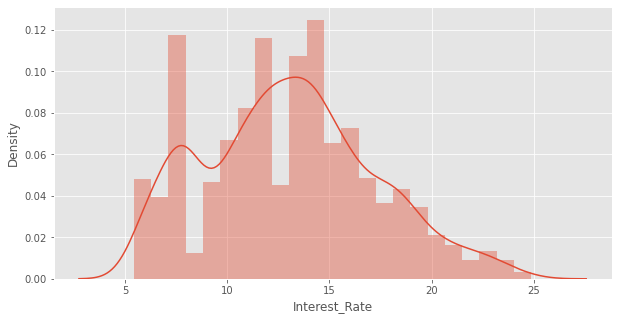

In [32]:
plt.figure(figsize=(10,5))
sns.distplot(df_final.Interest_Rate)
plt.show()

### Section 2: Feature Reduction

In [33]:
target = df_final['Interest_Rate']
features = df_final[df_final.columns.difference(['Interest_Rate'])]

display(target, features)

0       18.49
1       17.27
2       14.33
3       16.29
4       12.23
        ...  
2195    23.28
2196    14.33
2197    15.31
2198    20.99
2199    10.16
Name: Interest_Rate, Length: 2186, dtype: float64

,Amount_Funded_By_Investors,Amount_Requested,Debt_To_Income_Ratio,Employment_Length,Fico_Mean,Home_Ownership_OTHER,Home_Ownership_OWN,Home_Ownership_RENT,Inquiries_in_the_Last_6_Months,Loan_Length,...,State_SC,State_SD,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,25000.00,25000.0,27.56,5.0,722.0,0,0,0,3.0,60.0,...,0,0,0,0,1,0,0,0,0,0
1,19750.00,19750.0,13.39,4.0,712.0,0,0,0,3.0,60.0,...,0,0,0,0,0,0,0,0,0,0
2,2100.00,2100.0,3.50,1.0,692.0,0,1,0,1.0,36.0,...,0,0,0,0,0,0,0,0,0,0
3,28000.00,28000.0,19.62,10.0,712.0,0,0,0,1.0,36.0,...,0,0,0,0,0,0,0,0,0,0
4,17431.82,24250.0,23.79,10.0,732.0,0,0,0,2.0,60.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,30000.00,30000.0,12.10,10.0,677.0,0,0,0,1.0,60.0,...,0,0,0,0,0,0,0,0,0,0
2196,4200.00,4200.0,14.16,2.0,702.0,0,0,1,0.0,60.0,...,0,0,0,0,0,0,0,0,0,0
2197,19775.00,19800.0,15.03,6.0,677.0,0,0,0,3.0,60.0,...,0,0,0,0,0,0,0,0,0,0
2198,18000.00,18000.0,11.63,4.0,672.0,0,0,1,2.0,60.0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

rfe = RFE(lm, n_features_to_select=10)

rfe = rfe.fit(features,target)
rfe

RFE(estimator=LinearRegression(), n_features_to_select=10)

In [35]:
RFE_imp_vars = features.columns[rfe.get_support()]
list(RFE_imp_vars)

['Home_Ownership_OTHER',
 'Loan_Purpose_house',
 'Loan_Purpose_moving',
 'Loan_Purpose_renewable_energy',
 'State_AK',
 'State_HI',
 'State_LA',
 'State_MT',
 'State_SD',
 'State_VT']

In [36]:
from sklearn.feature_selection import f_regression

f_reg, p_val = f_regression(features,target)

f_reg = pd.Series(f_reg)
p_val = pd.Series(p_val)
cols = pd.Series(features.columns)

In [37]:
f_reg_res = pd.concat([cols,f_reg,p_val],axis=1)
f_reg_res.columns = ['cols','F_values','p_values']
f_reg_res

,cols,F_values,p_values
0,Amount_Funded_By_Investors,279.751224,3.493429e-59
1,Amount_Requested,271.853637,1.178647e-57
2,Debt_To_Income_Ratio,73.991827,1.472001e-17
3,Employment_Length,2.887689,8.940126e-02
4,Fico_Mean,2237.147784,0.000000e+00
...,...,...,...
66,State_VT,6.745034,9.464007e-03
67,State_WA,0.008284,9.274859e-01
68,State_WI,0.698737,4.032999e-01
69,State_WV,0.060388,8.059063e-01


In [38]:
top_10_f_reg = f_reg_res.sort_values(by=['F_values'],ascending=False).head(10)

list(top_10_f_reg.cols)

['Home_Ownership_OTHER',
 'Loan_Purpose_house',
 'Loan_Purpose_moving',
 'Loan_Purpose_renewable_energy',
 'State_AK',
 'State_HI',
 'State_LA',
 'State_MT',
 'State_SD',
 'State_VT']

['Home_Ownership_OTHER',
 'Loan_Purpose_house',
 'Loan_Purpose_moving',
 'Loan_Purpose_renewable_energy',
 'State_AK',
 'State_HI',
 'State_LA',
 'State_MT',
 'State_SD',
 'State_VT']

In [39]:
from sklearn.feature_selection import SelectKBest,f_classif ,chi2

selector = SelectKBest(f_classif, k=10)

selector.fit(features, target)

SelectKBest()

In [40]:
K_Best_10 = features.columns[selector.get_support()]

list(K_Best_10)

['Amount_Funded_By_Investors',
 'Amount_Requested',
 'Fico_Mean',
 'Inquiries_in_the_Last_6_Months',
 'Loan_Length',
 'Loan_Purpose_educational',
 'State_IN',
 'State_MO',
 'State_MS',
 'State_VT']

### Correlation Method:

In [41]:
df_final.corrwith(df_final.Interest_Rate)

Amount_Requested              0.332710
Amount_Funded_By_Investors    0.336967
Loan_Length                   0.426056
Debt_To_Income_Ratio          0.181022
Monthly_Income                0.038563
                                ...   
State_WY                      0.004229
Home_Ownership_OTHER          0.035582
Home_Ownership_OWN           -0.024308
Home_Ownership_RENT           0.089989
Interest_Rate                 1.000000
Length: 72, dtype: float64

In [42]:
column_names = pd.Series(list(df_final.corrwith(df_final.Interest_Rate).index),name='Column_Names')
r_values =  pd.Series(list(df_final.corrwith(df_final.Interest_Rate)),name='r_values')

corr = pd.concat([column_names,r_values],axis=1)

In [43]:
corr_12 = corr.sort_values(by=['r_values'],ascending=False).head(12)

list(corr_12['Column_Names'])

['Interest_Rate',
 'Loan_Length',
 'Amount_Funded_By_Investors',
 'Amount_Requested',
 'Debt_To_Income_Ratio',
 'Inquiries_in_the_Last_6_Months',
 'Loan_Purpose_debt_consolidation',
 'Home_Ownership_RENT',
 'Open_CREDIT_Lines',
 'Revolving_CREDIT_Balance',
 'State_VT',
 'State_AK']

### Final Variables

In [44]:
Final_Vars = {
 'Home_Ownership_OTHER',
 'Loan_Purpose_credit_card',
 'Loan_Purpose_debt_consolidation',
 'Loan_Purpose_house',
 'Loan_Purpose_moving',
 'Loan_Purpose_other',
 'Loan_Purpose_small_business',
 'State_MT',
 'State_SD',
 'Loan_Length',
 'Amount_Funded_By_Investors',
 'Amount_Requested',
 'Debt_To_Income_Ratio',
 'Inquiries_in_the_Last_6_Months',
 'Loan_Purpose_debt_consolidation',
 'Loan_Purpose_major_purchase',
 'Loan_Purpose_home_improvement',
 'Home_Ownership_RENT',
'Amount_Funded_By_Investors',
 'Fico_Mean',
 'Home_Ownership_OTHER',
 'Inquiries_in_the_Last_6_Months',
 'Loan_Length',
 'Loan_Purpose_educational',
 'State_IN',
 'State_MS',
 'Loan_Length',
 'Amount_Funded_By_Investors',
 'Amount_Requested',
 'Debt_To_Income_Ratio',
 'Inquiries_in_the_Last_6_Months',
 'Loan_Purpose_debt_consolidation',
 'Loan_Purpose_major_purchase',
 'Loan_Purpose_home_improvement',
 'Home_Ownership_RENT',
 'Revolving_CREDIT_Balance'}

In [45]:
Final_Vars = list(Final_Vars)

features2 = df_final[Final_Vars]

features2

,Debt_To_Income_Ratio,Loan_Purpose_small_business,Loan_Purpose_educational,Inquiries_in_the_Last_6_Months,State_MT,Loan_Length,Loan_Purpose_debt_consolidation,Fico_Mean,State_SD,State_IN,...,Revolving_CREDIT_Balance,Home_Ownership_OTHER,Loan_Purpose_house,Home_Ownership_RENT,Loan_Purpose_other,Loan_Purpose_credit_card,Amount_Requested,Loan_Purpose_moving,Loan_Purpose_home_improvement,State_MS
0,27.56,0,0,3.0,0,60.0,1,722.0,0,0,...,15210.0,0,0,0,0,0,25000.0,0,0,0
1,13.39,0,0,3.0,0,60.0,1,712.0,0,0,...,19070.0,0,0,0,0,0,19750.0,0,0,0
2,3.50,0,0,1.0,0,36.0,0,692.0,0,0,...,893.0,0,0,0,0,0,2100.0,0,0,0
3,19.62,0,0,1.0,0,36.0,0,712.0,0,0,...,38194.0,0,0,0,0,1,28000.0,0,0,0
4,23.79,0,0,2.0,0,60.0,0,732.0,0,0,...,31061.0,0,0,0,0,1,24250.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,12.10,0,0,1.0,0,60.0,0,677.0,0,0,...,17969.0,0,0,0,1,0,30000.0,0,0,0
2196,14.16,0,0,0.0,0,60.0,0,702.0,0,0,...,5718.0,0,0,1,0,0,4200.0,0,0,0
2197,15.03,0,0,3.0,0,60.0,1,677.0,0,0,...,46879.0,0,0,0,0,0,19800.0,0,0,0
2198,11.63,0,0,2.0,0,60.0,0,672.0,0,0,...,32394.0,0,0,1,0,1,18000.0,0,0,0


In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [47]:
VIF = [variance_inflation_factor(features2.values,i) for i in range(features2.shape[1])]

In [63]:
VIF = pd.Series(VIF, name = 'VIF')

cols = pd.Series(features2.columns, name='Column_Name')

VIF_res = pd.concat([cols,VIF],axis=1)

VIF_10 = VIF_res.sort_values(by=['VIF']).head(10)

In [49]:
Final_Vars.append('Interest_Rate')

df_final = df_final[Final_Vars]

df_final

,Debt_To_Income_Ratio,Loan_Purpose_small_business,Loan_Purpose_educational,Inquiries_in_the_Last_6_Months,State_MT,Loan_Length,Loan_Purpose_debt_consolidation,Fico_Mean,State_SD,State_IN,...,Home_Ownership_OTHER,Loan_Purpose_house,Home_Ownership_RENT,Loan_Purpose_other,Loan_Purpose_credit_card,Amount_Requested,Loan_Purpose_moving,Loan_Purpose_home_improvement,State_MS,Interest_Rate
0,27.56,0,0,3.0,0,60.0,1,722.0,0,0,...,0,0,0,0,0,25000.0,0,0,0,18.49
1,13.39,0,0,3.0,0,60.0,1,712.0,0,0,...,0,0,0,0,0,19750.0,0,0,0,17.27
2,3.50,0,0,1.0,0,36.0,0,692.0,0,0,...,0,0,0,0,0,2100.0,0,0,0,14.33
3,19.62,0,0,1.0,0,36.0,0,712.0,0,0,...,0,0,0,0,1,28000.0,0,0,0,16.29
4,23.79,0,0,2.0,0,60.0,0,732.0,0,0,...,0,0,0,0,1,24250.0,0,0,0,12.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,12.10,0,0,1.0,0,60.0,0,677.0,0,0,...,0,0,0,1,0,30000.0,0,0,0,23.28
2196,14.16,0,0,0.0,0,60.0,0,702.0,0,0,...,0,0,1,0,0,4200.0,0,0,0,14.33
2197,15.03,0,0,3.0,0,60.0,1,677.0,0,0,...,0,0,0,0,0,19800.0,0,0,0,15.31
2198,11.63,0,0,2.0,0,60.0,0,672.0,0,0,...,0,0,1,0,1,18000.0,0,0,0,20.99


In [50]:
from sklearn.model_selection import train_test_split

In [51]:
train,test = train_test_split(df_final, test_size = 0.3, random_state = 123)

In [52]:
import statsmodels.formula.api as smf

In [53]:
model = smf.ols('Interest_Rate ~ Loan_Purpose_educational + Loan_Purpose_house +State_MS+ Loan_Length+ Fico_Mean+ Loan_Purpose_other+ Loan_Purpose_credit_card+ Home_Ownership_RENT+State_IN+ Loan_Purpose_small_business+ State_SD+Debt_To_Income_Ratio+ Loan_Purpose_debt_consolidation+Home_Ownership_OTHER+ Amount_Requested+ Revolving_CREDIT_Balance+State_MT+ Loan_Purpose_home_improvement+Amount_Funded_By_Investors+ Loan_Purpose_moving+Inquiries_in_the_Last_6_Months+ Loan_Purpose_major_purchase', data=train).fit()

print(model.summary2())

                        Results: Ordinary least squares
Model:                    OLS                  Adj. R-squared:         0.766    
Dependent Variable:       Interest_Rate        AIC:                    6554.9856
Date:                     2023-01-18 20:28     BIC:                    6677.6451
No. Observations:         1530                 Log-Likelihood:         -3254.5  
Df Model:                 22                   F-statistic:            228.0    
Df Residuals:             1507                 Prob (F-statistic):     0.00     
R-squared:                0.769                Scale:                  4.1850   
--------------------------------------------------------------------------------
                                 Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
--------------------------------------------------------------------------------
Intercept                       67.4050   1.2383  54.4335 0.0000 64.9761 69.8340
Loan_Purpose_educational         0.8716   0.6326   1.

## Now reducing Varibales on basis of P-value:

In [54]:
model = smf.ols('Interest_Rate ~ Loan_Length+ Fico_Mean + Amount_Funded_By_Investors+ Inquiries_in_the_Last_6_Months', data=train).fit()

print(model.summary2())

                        Results: Ordinary least squares
Model:                   OLS                  Adj. R-squared:         0.760    
Dependent Variable:      Interest_Rate        AIC:                    6574.8807
Date:                    2023-01-18 20:28     BIC:                    6601.5458
No. Observations:        1530                 Log-Likelihood:         -3282.4  
Df Model:                4                    F-statistic:            1210.    
Df Residuals:            1525                 Prob (F-statistic):     0.00     
R-squared:               0.760                Scale:                  4.2895   
-------------------------------------------------------------------------------
                                Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
-------------------------------------------------------------------------------
Intercept                      66.4861   1.0977  60.5663 0.0000 64.3329 68.6393
Loan_Length                     0.1374   0.0059  23.3930 0.0000 

## 4: Post Model

In [55]:
train['pred'] = model.predict(train)

train.head(3)

,Debt_To_Income_Ratio,Loan_Purpose_small_business,Loan_Purpose_educational,Inquiries_in_the_Last_6_Months,State_MT,Loan_Length,Loan_Purpose_debt_consolidation,Fico_Mean,State_SD,State_IN,...,Loan_Purpose_house,Home_Ownership_RENT,Loan_Purpose_other,Loan_Purpose_credit_card,Amount_Requested,Loan_Purpose_moving,Loan_Purpose_home_improvement,State_MS,Interest_Rate,pred
1828,20.09,0,0,0.0,0,36.0,0,732.0,0,0,...,0,0,0,1,19800.0,0,0,0,13.23,11.010102
1685,28.77,0,0,1.0,0,36.0,1,752.0,0,0,...,0,1,0,0,5000.0,0,0,0,9.91,7.580582
1696,19.93,0,0,0.0,0,36.0,0,757.0,0,0,...,0,0,1,0,22500.0,0,0,0,7.90,9.238807


In [56]:
test['pred'] = model.predict(test)

test.head(3)

,Debt_To_Income_Ratio,Loan_Purpose_small_business,Loan_Purpose_educational,Inquiries_in_the_Last_6_Months,State_MT,Loan_Length,Loan_Purpose_debt_consolidation,Fico_Mean,State_SD,State_IN,...,Loan_Purpose_house,Home_Ownership_RENT,Loan_Purpose_other,Loan_Purpose_credit_card,Amount_Requested,Loan_Purpose_moving,Loan_Purpose_home_improvement,State_MS,Interest_Rate,pred
237,8.70,0,0,0.0,0,36.0,0,752.0,0,0,...,0,0,0,1,8400.0,0,0,0,5.99,7.659606
1402,27.50,1,0,3.0,0,36.0,0,697.0,0,0,...,0,1,0,0,14000.0,0,0,0,14.09,14.428181
597,29.51,0,0,1.0,0,36.0,0,732.0,0,0,...,0,0,0,1,14600.0,0,0,0,9.76,10.677895


In [57]:
from sklearn import metrics
import scipy.stats as stats

In [58]:
MAPE_train = round(np.mean(np.abs((train.Interest_Rate - train.pred)/train.Interest_Rate))*100,2)
print('MAPE_train',MAPE_train)

MSE_train = metrics.mean_squared_error(train.Interest_Rate , train.pred)
print('MSE_train',MSE_train)

Corr_train = stats.stats.pearsonr(train.Interest_Rate , train.pred)
print('Corr_train',Corr_train)

MAPE_train 13.86
MSE_train 4.275472430335731
Corr_train PearsonRResult(statistic=0.8720054412311924, pvalue=0.0)


In [59]:
MAPE_test = round(np.mean(np.abs((test.Interest_Rate - test.pred)/test.Interest_Rate))*100,2)
print('MAPE_test',MAPE_test)

MSE_test = metrics.mean_squared_error(test.Interest_Rate , test.pred)
print('MSE_test',MSE_test)

Corr_test = stats.stats.pearsonr(test.Interest_Rate , test.pred)
print('Corr_test',Corr_test)

MAPE_test 13.21
MSE_test 3.8988886969847036
Corr_test PearsonRResult(statistic=0.8721475413708415, pvalue=3.1787847132447306e-205)


## Decile Analysis:

In [60]:
train['Deciles']=pd.qcut(train['pred'],10, labels=False)

In [61]:
avg_actual = train[['Deciles','Interest_Rate']].groupby(train.Deciles).mean().sort_index(ascending=False)['Interest_Rate']

avg_pred = train[['Deciles','pred']].groupby(train.Deciles).mean().sort_index(ascending=False)['pred']

Decile_analysis_train = pd.concat([avg_actual, avg_pred], axis=1)

Decile_analysis_train

,Interest_Rate,pred
Deciles,,
9,20.053791,19.403302
8,16.846316,16.518967
7,15.935974,15.324922
6,14.374967,14.519443
5,13.549346,13.817498
4,12.687647,13.093380
3,11.282876,12.050933
2,9.866797,10.749199
1,8.620392,9.131919


<AxesSubplot:xlabel='Deciles'>

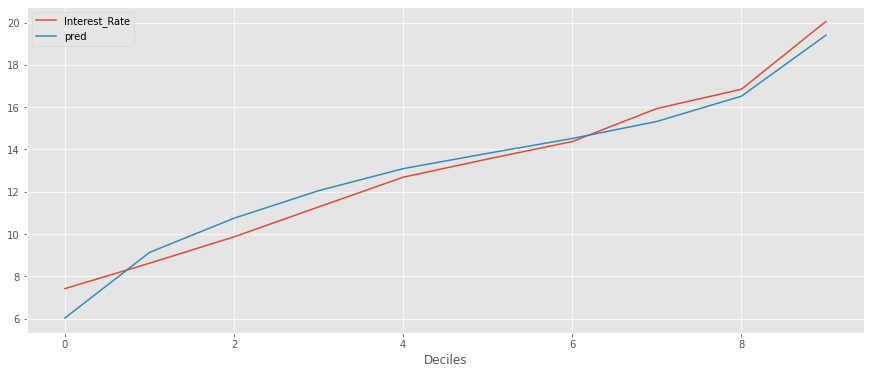

In [62]:
Decile_analysis_train.plot(kind='line', figsize=(15,6))

In [69]:
from sklearn.metrics import r2_score
print(r2_score(test.Interest_Rate , test.pred))

0.7605553853856835


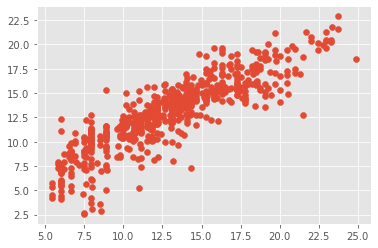

In [72]:
plt.scatter(test.Interest_Rate , test.pred)

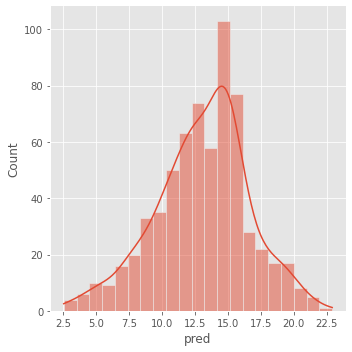

In [73]:
sns.displot(test.pred , kde=True)